# Monte Carlo Integration
  This notebook will be a tutorial on Monte Carlo integration, which approximates integrals by taking advantage of the relationship between averaging and integrals. 

  To begin, recall the definition of expected value of a random variable $X$ with a probability distribution function (PDF) $f_X(x)$ is 
$$
  \mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f_X(x) dx.
$$
Moreover, if we define a new random variable $Y$ that is a function of $X$ (i.e. $Y=h(X)$ for some function $h$), the expected value of $Y$ is as follows:
$$
  \mathbb{E}[Y] = \mathbb{E}[h(X)] = \int_{-\infty}^{\infty} h(x) \cdot f_X(x) dx.
$$

  The last fact we need is the law of large numbers states that we can approximate the expected value by averaging. So if we take $N$ sample from the distribution defined by $f_X(x)$, say $\{x_1, x_2, \dots, x_N\}$, we can approximate the exected value of $Y$ as
$$
  \mathbb{E}[Y] = \int_{-\infty}^{\infty} h(x) \cdot f_X(x) \,dx \approx \frac{1}{N} \sum_{i=1}^{N} h(x_i) \qquad \text{where $x_i$ is drawn from $X$.} 
$$
So instead of calculating the integral, which can be difficult, we can approximate it by plugging those $x_i$ values into $h$.

### Example 1: Approximating Integrals With Finite Bounds
One of the easier examples of Monte Carlo integration is with finite bound. In this example, we will look at $\int_0^1\left ( 1-x^2\right)^{3/2}dx$. To apply Monte Carlo integration, we need to write the integral in the form $\int_{-\infty}^{\infty} h(x) \cdot f_X(x) dx$. Since we have a finite integral with bounds 0 and 1, we can choose $f_X(x)$ to be the PDF of the uniform distribution. That means that $h(x)$ has to be $\left ( 1-x^2\right)^{3/2}$. Now that we know $h$ and the distribution of $X$, we can calculate the approximation. So let's draw $N=1,000$ samples from $\mathrm{Unif}(0,1)$, plug that into $h$ and find the average.

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
N=1000

# Define the function h
h = lambda x: (1-x**2)**(3.0/2)

# Define the distribution
dist = ss.uniform(loc=0, scale=1)

# Randomly draw N samples from the distribution
x = dist.rvs(N)

# Apply h to the samples
y = map(h,x)

# Average
sum(y)/N

0.59759842429474364

We can encapsulate this into a function for ease of use.

In [2]:
def MonteCarloApprox(h, dist, N=1000):
    """ INPUT: h -> a function.
               dist -> a probability distribution from scipy stats.
               N -> number of draws from the pdf
       OUTPUT: a float that is the approximation of the integral of h*pdf over real numbers.
    """
    # Draw x randomly
    x = dist.rvs(N)
    
    # Apply h to the samples
    y = map(h,x)
    
    # Average
    integralAprrox = sum(y)/N
    
    return integralAprrox

For comparison, we can actually calculate the integral by hand using trig substitution. 

\begin{align*}
  I &= \int_0^1\left ( 1-x^2 \right)^{3/2}\;dx 
    && \text{Let }x=\sin(u)\text{, then }dx=\cos(u)\;du\\
    &= \int_{\sin^{-1}(0)}^{\sin^{-1}(1)}\left ( 1-\sin^2(u)\right)^{3/2}\cos(u)\;du
    && \text{Use Pythagorean identitiy: }1-\sin^2(u)=\cos^2(u).\\    
    &= \int_{0}^{\pi/2}\left ( \cos^2(u)\right)^{3/2}\cos(u)\;du\\
    &= \int_{0}^{\pi/2}\cos^4(u)\;du
    && \text{Use the half-angle identity.}\\
    &= \int_{0}^{\pi/2}\frac{1}{4}\left[1+\cos(2u)\right]^2du\\
    &= \int_{0}^{\pi/2} \frac{1}{4} \left[1+2\cos(2u) + \cos^2(2u)\right] du
    && \text{Use the half-angle identity again.}\\
    &= \int_{0}^{\pi/2} \frac{1}{4} \left[1+2\cos(2u) + \frac{1}{2}+\frac{1}{2}\cos(4u)\right] du\\
    &= \frac{1}{4} \left[u + \sin(2u) + \frac{1}{2}u+\frac{1}{8}\sin(4u)\right]_{u=0}^{u=\pi/2}\\
    &= \frac{3\pi}{16}
\end{align*}

So we know the true value of the integral is $3\pi/16$. Note how tedious this integral was and this is a relatively easy integral to evaluate. Many integrals you might come across are impossible to do by hand, so we see why Monte Carlo integration is useful. 

Now let's run simulations to see how close we get to the correct value of $3\pi/16$. I'll calculate 100 approximation with different values of $N$. Namely, I'll use $N=1,000$, $N=10,000$ and $N=100,000$ and compare the box plots. 

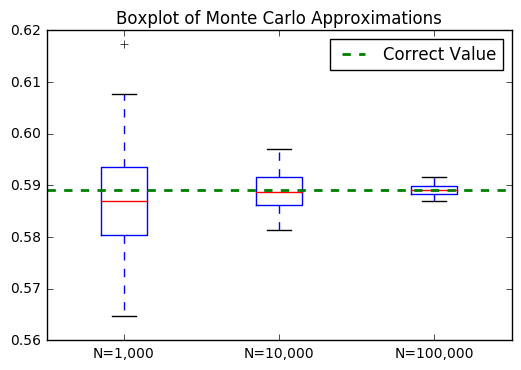

In [3]:
% matplotlib inline
def plotApproximations(h, dist, correctValue=None):
    """ INPUT: h -> a function.
               dist -> a probability distribution from scipy stats.
               correctValue -> (optional) The correct vlaue of the integral to 
                 be approximated
       OUTPUT: Displays 3 blox plots with N=1,000 iterations, N=10,000 
               iterations and N=100,000 iterations. If the correctValue is given
               a green horixontal line will also be displayed over the boxplots 
    """
    
    # 100 Approximation with N=100
    I_1000 = map(lambda i: MonteCarloApprox(h, dist, N=1000), range(100))      

    # 100 Approximation with N=1000
    I_10000 = map(lambda i: MonteCarloApprox(h, dist, N=10000), range(100))    
    
    # 100 Approximation with N=10000
    I_100000 = map(lambda i: MonteCarloApprox(h, dist, N=100000), range(100))  
    
    # Creating boxplots
    plt.figure(figsize=[6,4])
    plt.boxplot([I_1000,I_10000,I_100000], labels=["N=1,000","N=10,000","N=100,000"])
    plt.title("Boxplot of Monte Carlo Approximations")
    
    # Plotting the correct values
    if correctValue is not None:
        plt.axhline(y=correctValue, color="g", ls="--", lw=2, label="Correct Value")
        plt.legend()

h = lambda x: (1-x**2)**(3.0/2)
dist = ss.uniform(loc=0, scale=1)

# True value for comparison
correctValue = 3*np.pi/16

plotApproximations(h, dist, correctValue)

So we see that for larger values of $N$ we are more likely to get an approximation close to the true value. 

Generally, if we have an integral with finite bounds $a$ and $b$, we choose $f_X(x)$ to be the pdf of $\mathrm{Unif}(a,b)$ and we choose $h(x)$ to be the entire function in the integral. 

### Example 2: Approximating Integrals With Infinite Bounds
As we saw in the previous example if we have finite bounds we can always sample from the uniform distribution. However if we look at 
$$\int_0^\infty \frac{x}{\left(1+x^2\right)^{2}} dx,$$ 
we can't use the uniform distribution, $\mathrm{Unif}(a,b)$, because it can only draw samples, $x_i$, from the interval $(a,b)$ but we need to samples to come from the interval $(0,\infty)$. So instead of the uniform distribution, we can use the exponential distribution with $\lambda=1$, $\mathrm{exp}(1)$. This is a good choice since if we randomly sample the exponential distribution, we will get values between 0 and infinity. However, it complecates how we choose $h(x)$ because $f_X(x)$ is no longer a constant like it was in the previous example so we can't just choose $h$ to be the entire function in the integral. Recall that we essentially want to write the function in the integral, ${x}/{\left(1+x^2\right)^{2}}$, as $h(x) \cdot f_X(x)$. If we choose $X\sim\exp(1)$, then the pdf is $f_X(x)=e^{-x}$. If we plug this in, we can solve for $h(x)$.

\begin{align*}
  \frac{x}{\left(1+x^2\right)^{2}} &= h(x) \cdot f_X(x) \\
   \frac{x}{\left(1+x^2\right)^{2}} \cdot e^{x} &= h(x) \cdot e^{-x} \cdot e^{x}  \\
   \frac{xe^{x}}{\left(1+x^2\right)^{2}} &= h(x)
\end{align*}

So now that we know $h(x)$ and we know know the distribution is $X\sim\exp(1)$, we can calculate the Monte Carlo approximation by calculating the following:

\begin{align*}
  \int_0^\infty \frac{x}{\left(1+x^2\right)^{2}} dx 
  &\approx \frac{1}{N}\sum_{i=1}^{N}h(x_i)
  = \frac{1}{N}\sum_{i=1}^{N}\frac{x_ie^{x_i}}{\left(1+{x_i}^2\right)^{2}}
\end{align*}

where $x_i$ is drawn randomly from $\exp(1)$ for each $i$.

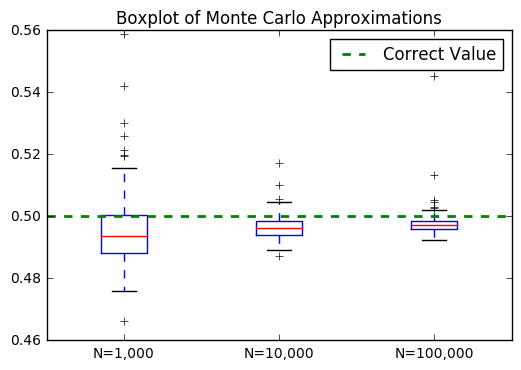

In [4]:
h = lambda x: (x*np.exp(x))/np.power(1+np.power(x, 2), 2)
dist = ss.expon(loc=0, scale=1)
correctVal = 1.0/2

plotApproximations(h, dist, correctVal)